In [1]:
import numpy as np
import pandas as pd
import math 

import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

C:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv("data/df.csv")
data.head()

,is_fraud,transaction_amount,relative_timestamp,F1,F2,F3,F4,F5,F6,F7,...,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30
0,0,118.44,159609.0,1.928977,-0.745709,-1.742981,-0.247731,-0.379232,-1.504379,0.426988,...,-0.096171,0.153526,-0.001283,0.631590,0.130582,0.758711,-0.113741,-0.063939,0.795595,-2.200074
1,0,1.98,162525.0,2.060450,-0.136926,-1.085910,0.430300,-0.254977,-1.247417,0.104193,...,-0.302288,-0.795267,0.355477,0.013651,-0.340015,0.199361,-0.078557,-0.062377,0.921937,0.216959
2,0,103.00,58956.0,1.114014,-1.533296,0.741385,-1.385897,-1.241643,1.088519,-1.433041,...,0.140363,0.783574,0.082555,-0.615175,-0.036441,-0.006456,0.109368,0.032635,0.225000,-2.467540
3,0,16.70,148842.0,0.514410,1.389934,-1.091181,1.604760,0.460984,-0.381953,-0.599145,...,-1.670931,-0.854670,0.130428,0.789378,0.909599,-0.692159,-0.033316,0.096833,0.586722,1.187643
4,0,110.14,125542.0,-0.849330,0.399191,-0.319642,-1.220384,1.062371,1.752440,0.558836,...,0.134113,0.278606,0.198983,-0.936208,-0.477630,-0.087217,0.035566,0.090183,0.569712,-1.485808


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 33 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   is_fraud            284807 non-null  int64  
 1   transaction_amount  284807 non-null  float64
 2   relative_timestamp  284807 non-null  float64
 3   F1                  284807 non-null  float64
 4   F2                  284807 non-null  float64
 5   F3                  284807 non-null  float64
 6   F4                  284807 non-null  float64
 7   F5                  284807 non-null  float64
 8   F6                  284807 non-null  float64
 9   F7                  284807 non-null  float64
 10  F8                  284807 non-null  float64
 11  F9                  284807 non-null  float64
 12  F10                 284807 non-null  float64
 13  F11                 284807 non-null  float64
 14  F12                 284807 non-null  float64
 15  F13                 284807 non-nul

In [4]:
data.isnull().sum() 

is_fraud                  0
transaction_amount        0
relative_timestamp        0
F1                        0
F2                        0
F3                        0
F4                        0
F5                        0
F6                        0
F7                        0
F8                        0
F9                        0
F10                       0
F11                       0
F12                       0
F13                       0
F14                       0
F15                       0
F16                       0
F17                       0
F18                       0
F19                       0
F20                       0
F21                       0
F22                       0
F23                       0
F24                       0
F25                       0
F26                       0
F27                       0
F28                       0
F29                    5770
F30                   11655
dtype: int64

In [5]:
from sklearn.impute import SimpleImputer

index = data.columns
imputer = SimpleImputer(missing_values = np.nan,strategy='mean')
data = pd.DataFrame(imputer.fit_transform(data),columns=index)

In [6]:
Y = data.is_fraud
X = data.drop('is_fraud',axis = 1)

Not Fraud transactions:  99.827% / 284315 per whole dataset 
Fraud transactions: 0.173% / 492


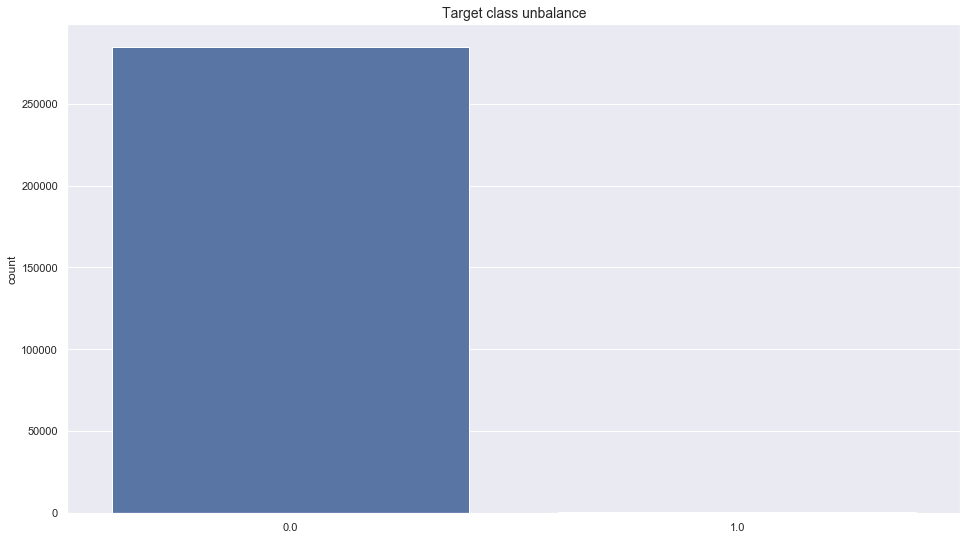

In [7]:
print("Not Fraud transactions:  {0}% / {1} per whole dataset \nFraud transactions: {2}% / {3}"\
      .format(round(data.is_fraud.value_counts()[0] / data.shape[0] * 100,3), data.is_fraud.value_counts()[0], \
              round(data.is_fraud.value_counts()[1] / data.shape[0] * 100,3), data.is_fraud.value_counts()[1]))
sns.set(rc={'figure.figsize':(16,9)})
sns.countplot(data.is_fraud.values)

plt.title("Target class unbalance",fontsize=14)
plt.show()

In [8]:
data.describe()

,is_fraud,transaction_amount,relative_timestamp,F1,F2,F3,F4,F5,F6,F7,...,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30
count,284807.000000,284807.000000,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,0.001727,88.349619,94813.859575,1.128590e-15,3.679371e-16,-1.399290e-15,2.073824e-15,1.100475e-15,1.493984e-15,-5.623051e-16,...,1.434205e-16,-3.404726e-16,2.619922e-16,4.479973e-15,5.329860e-16,1.686942e-15,-3.583107e-16,-1.234044e-16,0.000234,0.001730
std,0.041527,250.120109,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.571173,1.695987
min,0.000000,0.000000,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,-0.999996,-2.999968
25%,0.000000,5.600000,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,-0.488461,-1.439572
50%,0.000000,22.000000,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000234,0.001730
75%,0.000000,77.165000,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.488551,1.434529
max,1.000000,25691.160000,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,0.999990,2.999969


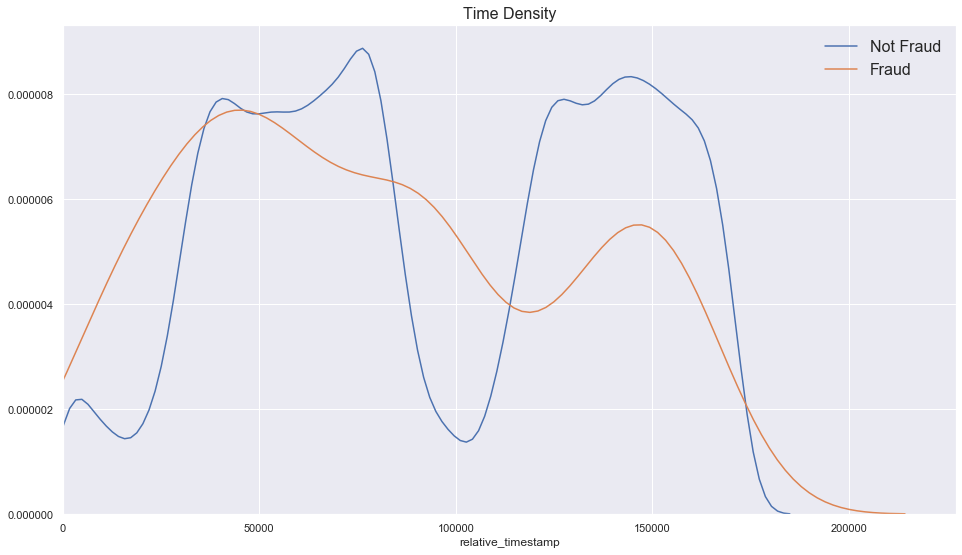

In [9]:
sns.distplot(data.relative_timestamp.loc[data.is_fraud == 0],label="Not Fraud",hist=False)
sns.distplot(data.relative_timestamp.loc[data.is_fraud == 1],label = "Fraud" ,hist=False)
plt.xlim(xmin=0)
plt.legend(frameon=False, loc='upper right', prop={'size':16})
plt.title("Time Density",fontsize = 16)
plt.show()

In [10]:
data.relative_timestamp.max() / ( 60 * 60)

47.99777777777778

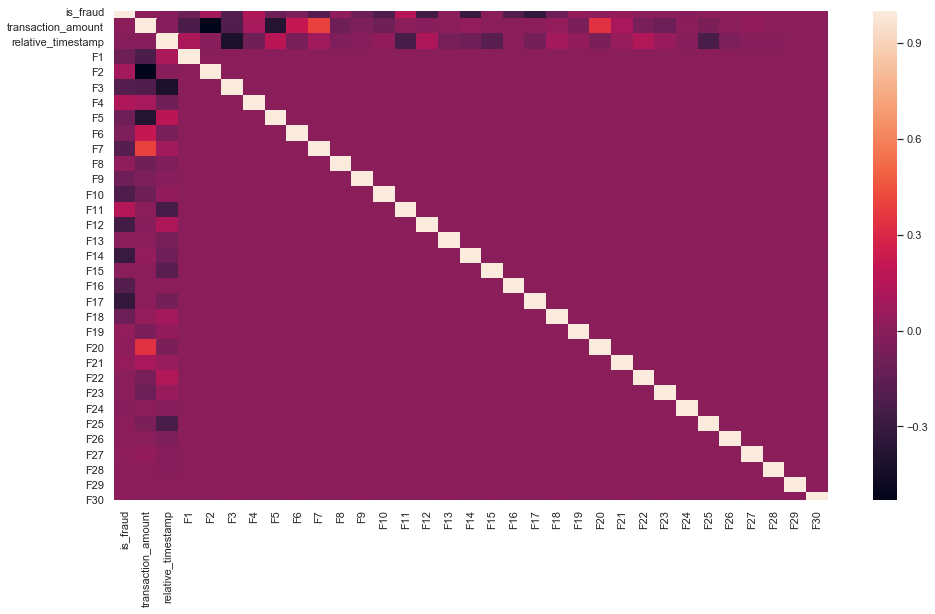

In [11]:
sns.heatmap(data.corr())

C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<Figure size 1152x648 with 0 Axes>

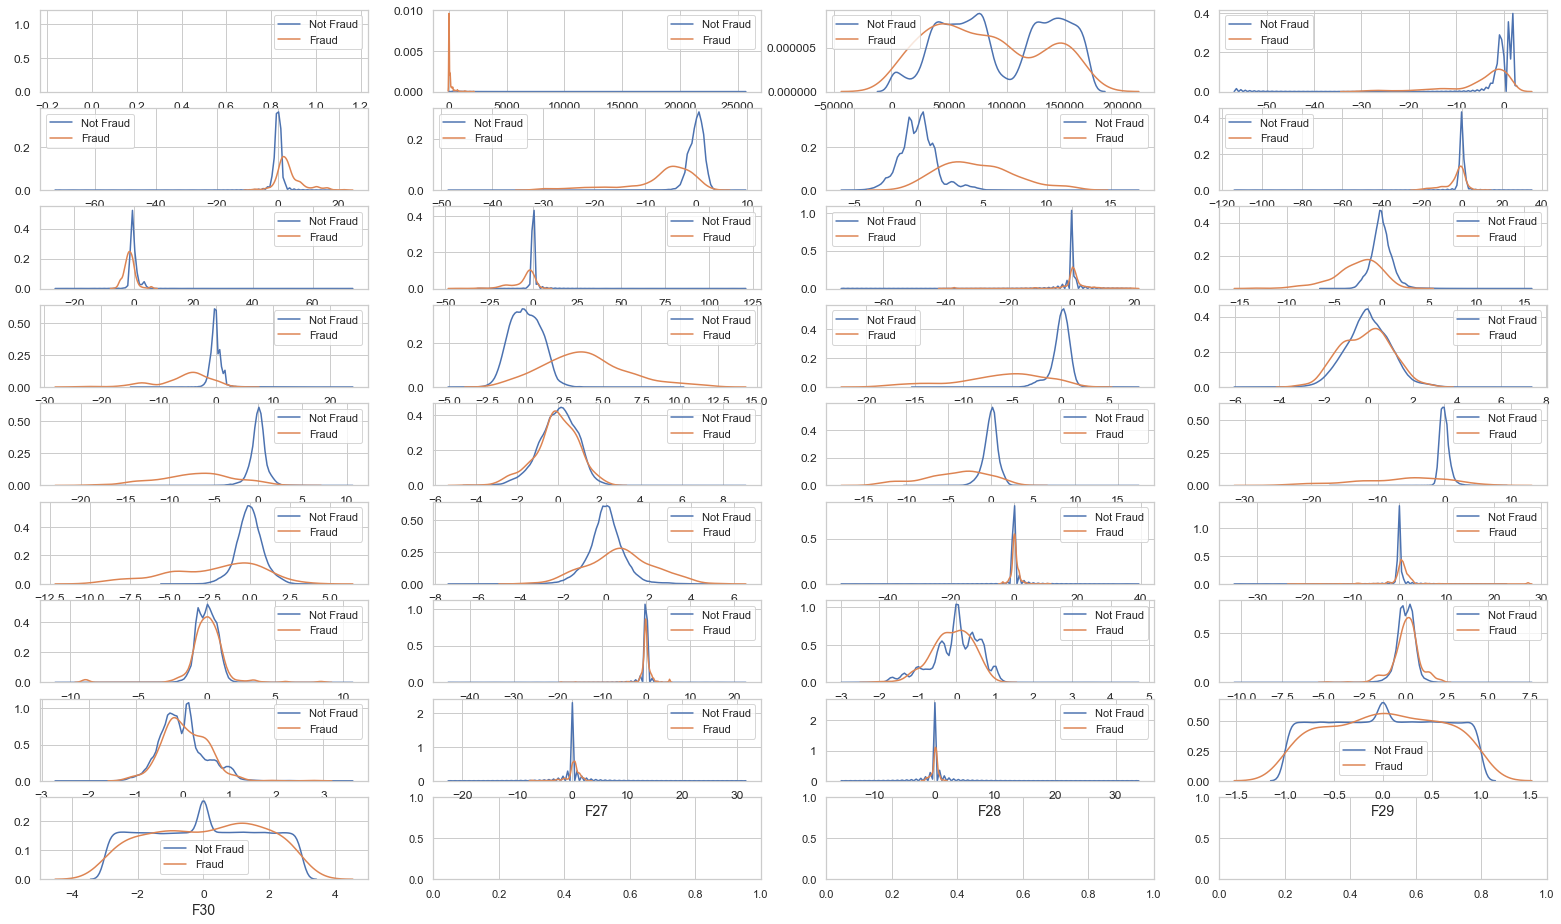

In [12]:
sns.set_style('whitegrid')
plt.figure()
fig,axes = plt.subplots(9,4,figsize=(27,16))

p = 0
for feat in index:
    p += 1
    plt.subplot(9,4,p)
    sns.kdeplot(data[feat].loc[data.is_fraud == 0],label = "Not Fraud")
    sns.kdeplot(data[feat].loc[data.is_fraud == 1],label ="Fraud")
    plt.xlabel(feat, fontsize = 14)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)

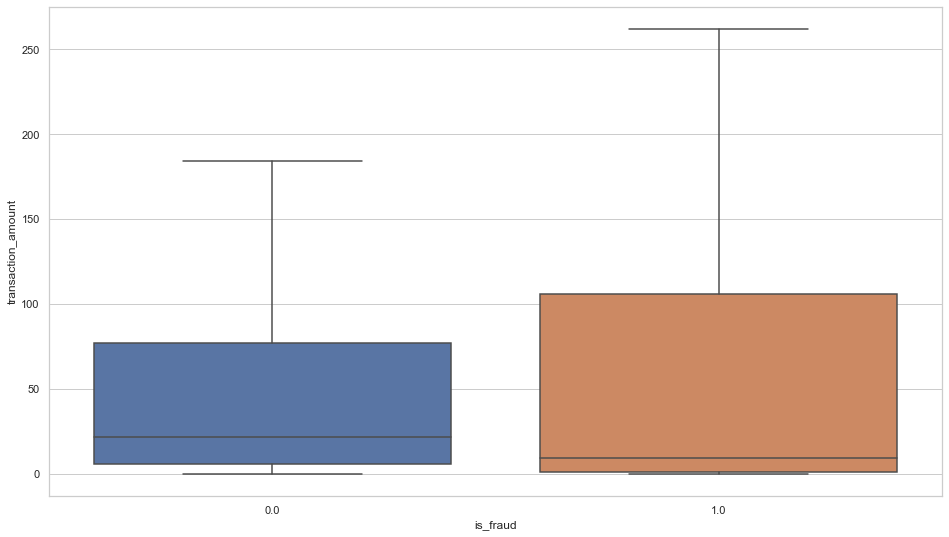

In [13]:
sns.boxplot(data.is_fraud,data.transaction_amount,showfliers=False)
plt.show()

### Summary:
- Binary Classification task .
- Transactions count is small ( len(data) <  285000) .
- F1 - F30 seems to be a result of some transformation (PCA ?).
- Some Values is null or NaN ,filled by feature mean value.
- Target class count is < 1% i.e. dataset highly imbalanced  <-- Key Point.
- Amount mean is  small - 88$
- Timestamp interval is  0 - 175000 ,max value is 172792 ~ 2 days (48 hours or 172800 sec)
- Zero correlation between F1 - F30 features

### Train RandomForestClassifier,CatBoostClassifier,XGBoost on:
- default data 
- under sampled data
- data after SMOTE 

- Default metric - ROC AUC
- Also explore most valuable features for alg

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
import xgboost as xgb

n_jobs = 5
metric = roc_auc_score
n_estimators = 100
random_state = 2102
test_size = 0.2
valid_size = 0.2

In [15]:
train_df, test_df = train_test_split(data, test_size=test_size, random_state=random_state, shuffle=True )
train_df, valid_df = train_test_split(train_df, test_size=valid_size, random_state=random_state, shuffle=True )


In [16]:
models = {'rfc' : RandomForestClassifier(n_jobs=n_jobs, 
                         random_state=random_state,
                         criterion="gini",
                         n_estimators=n_estimators,
                         verbose=False),

         'cb' : CatBoostClassifier(iterations=500,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='AUC',
                             random_seed = random_state,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 50,
                             od_wait=100),
         'xgb' : {'objective':'binary:logistic',
                     'eta': 0.039,'silent': True,
                     'max_depth' : 2,'subsample' : 0.8,
                      'colsample_bytree' : 0.9,'eval_metric' : 'auc',
                      'random_state' : random_state
                     }}

def all_(train_df,test_df,valid_df):
    '''
    Function to train classifiers on test data and predict results
    
    Args:
       - train_df - dataset for train
       - test_df - dataset for test
       - valid_df - dataset for validation 
    Return:
       - predicted values per alg -> dict{key : arr}
       - roc_auc_score per alg -> dict{key: float}
       - feature importance per alg  -> dict{key : arr}, if key == 'xgb' -> object
    '''
    predicted = {}
    scores = {}
    feauters_imp = {}
    
    for j in models.keys():
        if j == "rfc":
            model = models[j]
            model.fit(train_df[index[1:]],train_df['is_fraud'])
            preds = model.predict(valid_df[index[1:]])
            predicted[j] =  model.predict(valid_df[index[1:]])
            feauters_imp[j] = model.feature_importances_
            scores[j] = roc_auc_score(valid_df[index[0]].values, preds) 
        if j == 'cb':
            model = models[j]
            model.fit(train_df[index[1:]],train_df['is_fraud'],verbose = True)
            preds = model.predict(valid_df[index[1:]])
            predicted[j] =  model.predict(valid_df[index[1:]])
            feauters_imp[j] = model.feature_importances_
            scores[j] = roc_auc_score(valid_df[index[0]].values, preds) 
        if j == 'xgb': 
            dtrain = xgb.DMatrix(train_df[index[1:]], train_df[index[0]].values)
            dvalid = xgb.DMatrix(valid_df[index[1:]], valid_df[index[0]].values)
            dtest = xgb.DMatrix(test_df[index[1:]], test_df[index[0]].values)
            watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
            params = models[j]
            model = xgb.train(params, 
                            dtrain, 
                            1000, 
                            watchlist, 
                            early_stopping_rounds=50, 
                            maximize=True, 
                            verbose_eval=50)
            preds = model.predict(dtest)
            scores[j] = roc_auc_score(test_df[index[0]].values, preds)
            feauters_imp[j] = model
    return predicted,scores,feauters_imp


### Using imbalanced (default) data 

In [17]:
predicted, scores, feauters_imp = all_(train_df,test_df,valid_df)

0:	total: 1.24s	remaining: 10m 17s
50:	total: 47.9s	remaining: 7m 1s
100:	total: 1m 35s	remaining: 6m 16s
150:	total: 2m 24s	remaining: 5m 32s
200:	total: 3m 17s	remaining: 4m 53s
250:	total: 4m 8s	remaining: 4m 6s
300:	total: 4m 58s	remaining: 3m 17s
350:	total: 5m 46s	remaining: 2m 27s
400:	total: 6m 34s	remaining: 1m 37s
450:	total: 7m 23s	remaining: 48.1s
499:	total: 8m 9s	remaining: 0us
[0]	train-auc:0.889219	valid-auc:0.889556
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 50 rounds.
[50]	train-auc:0.917571	valid-auc:0.923395
[100]	train-auc:0.962857	valid-auc:0.948407
[150]	train-auc:0.973083	valid-auc:0.972311
Stopping. Best iteration:
[125]	train-auc:0.972928	valid-auc:0.972428



In [18]:
scores.items()

dict_items([('rfc', 0.898261138360353), ('cb', 0.8982831115530578), ('xgb', 0.9801108875598636)])

In [19]:
pd.crosstab(valid_df[index[0]].values,predicted['cb'], rownames=['Actual'], colnames=['Predicted'])

Predicted,0.0,1.0
Actual,,
0.0,45508,2
1.0,12,47


In [20]:
pd.crosstab(valid_df[index[0]].values,predicted['rfc'], rownames=['Actual'], colnames=['Predicted'])

Predicted,0.0,1.0
Actual,,
0.0,45506,4
1.0,12,47


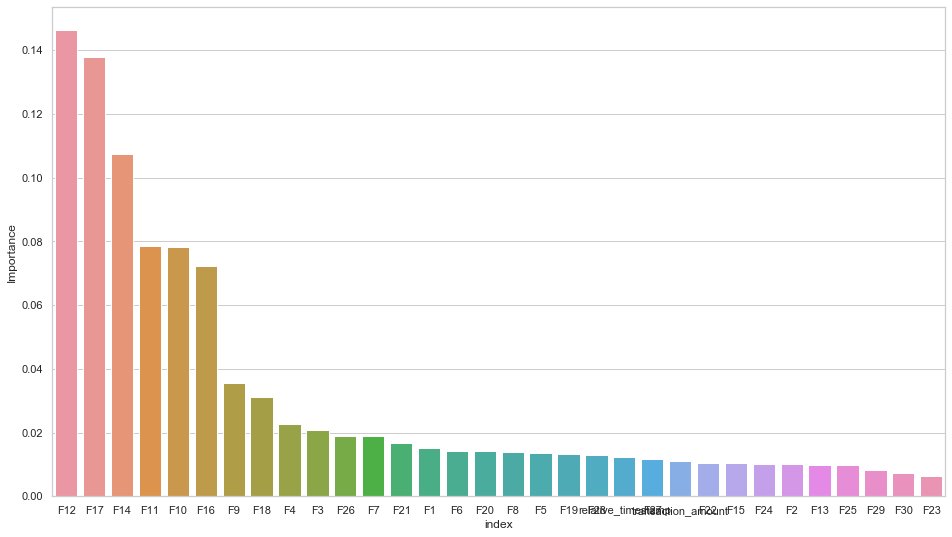

In [22]:
tmp_rfc = pd.DataFrame({"Importance" : feauters_imp['rfc'],"index" : index[1:].values})\
.sort_values("Importance",ascending=False)
tmp_rfc.index = range(32)
sns.barplot(x = "index",y = "Importance", data = tmp_rfc)


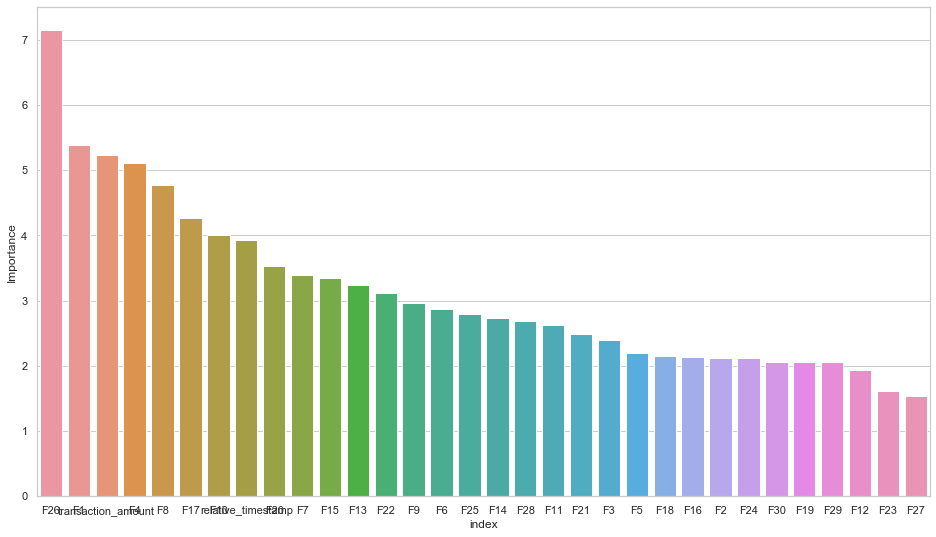

In [23]:
tmp_cb = pd.DataFrame({"Importance" : feauters_imp['cb'],"index" : index[1:].values})\
.sort_values("Importance",ascending=False)
tmp_cb.index = range(32)

sns.barplot(x = "index",y = "Importance", data = tmp_cb)

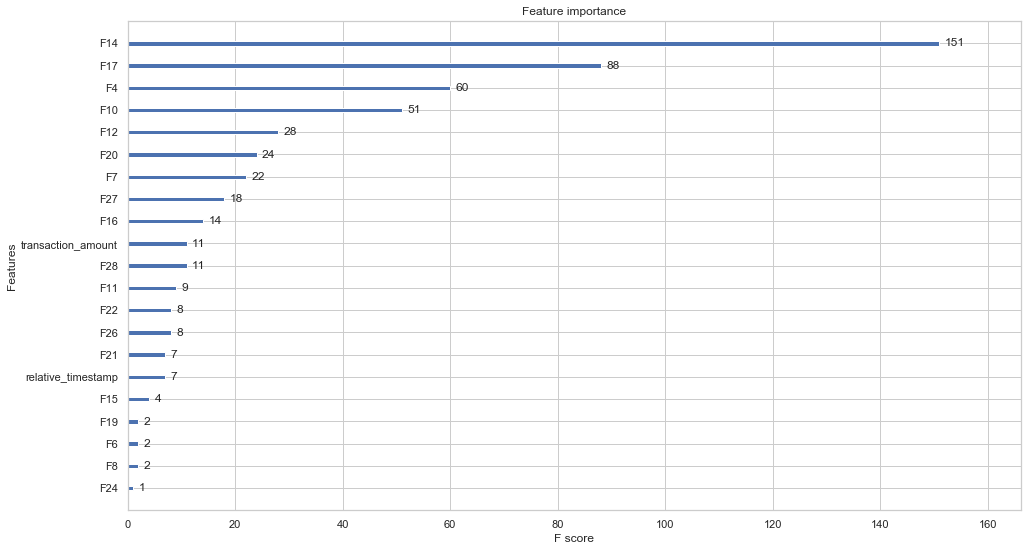

In [24]:
xgb.plot_importance(feauters_imp['xgb'])

### Under-Sampling (50/50 ratio) for target class

In [25]:
sample_index = np.random.choice(data.loc[data.is_fraud == 0].shape[0],Y.value_counts()[1],replace = False)
sample_data_0 = data.loc[sample_index]
sample_data_1 = data.loc[data.is_fraud == 1]


In [26]:
sample = pd.concat([sample_data_0,sample_data_1]).sample(frac = 1)

In [27]:
train_df, test_df = train_test_split(sample, test_size=test_size, random_state=random_state, shuffle=True )
train_df, valid_df = train_test_split(train_df, test_size=valid_size, random_state=random_state, shuffle=True )

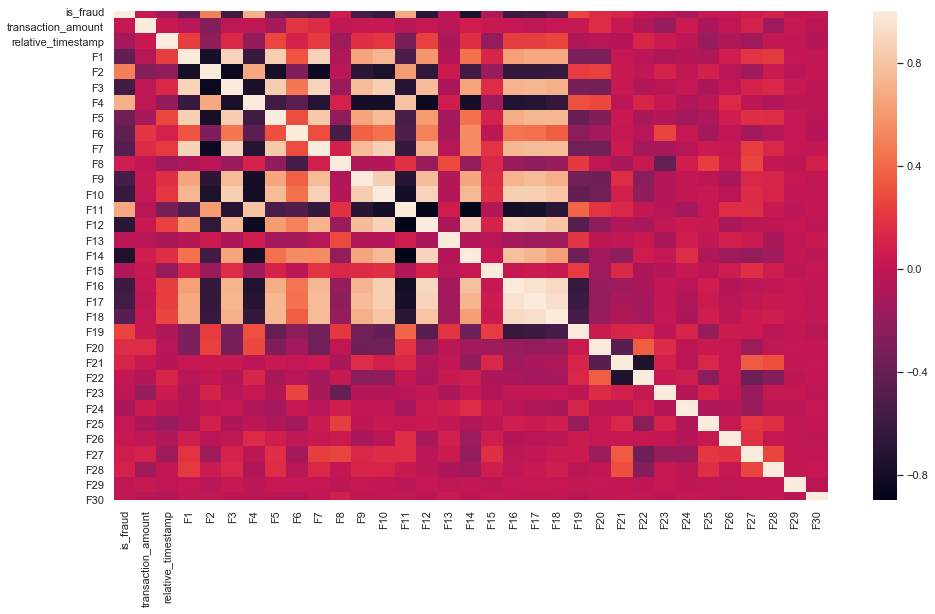

In [28]:
sns.heatmap(sample.corr())

C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<Figure size 1152x648 with 0 Axes>

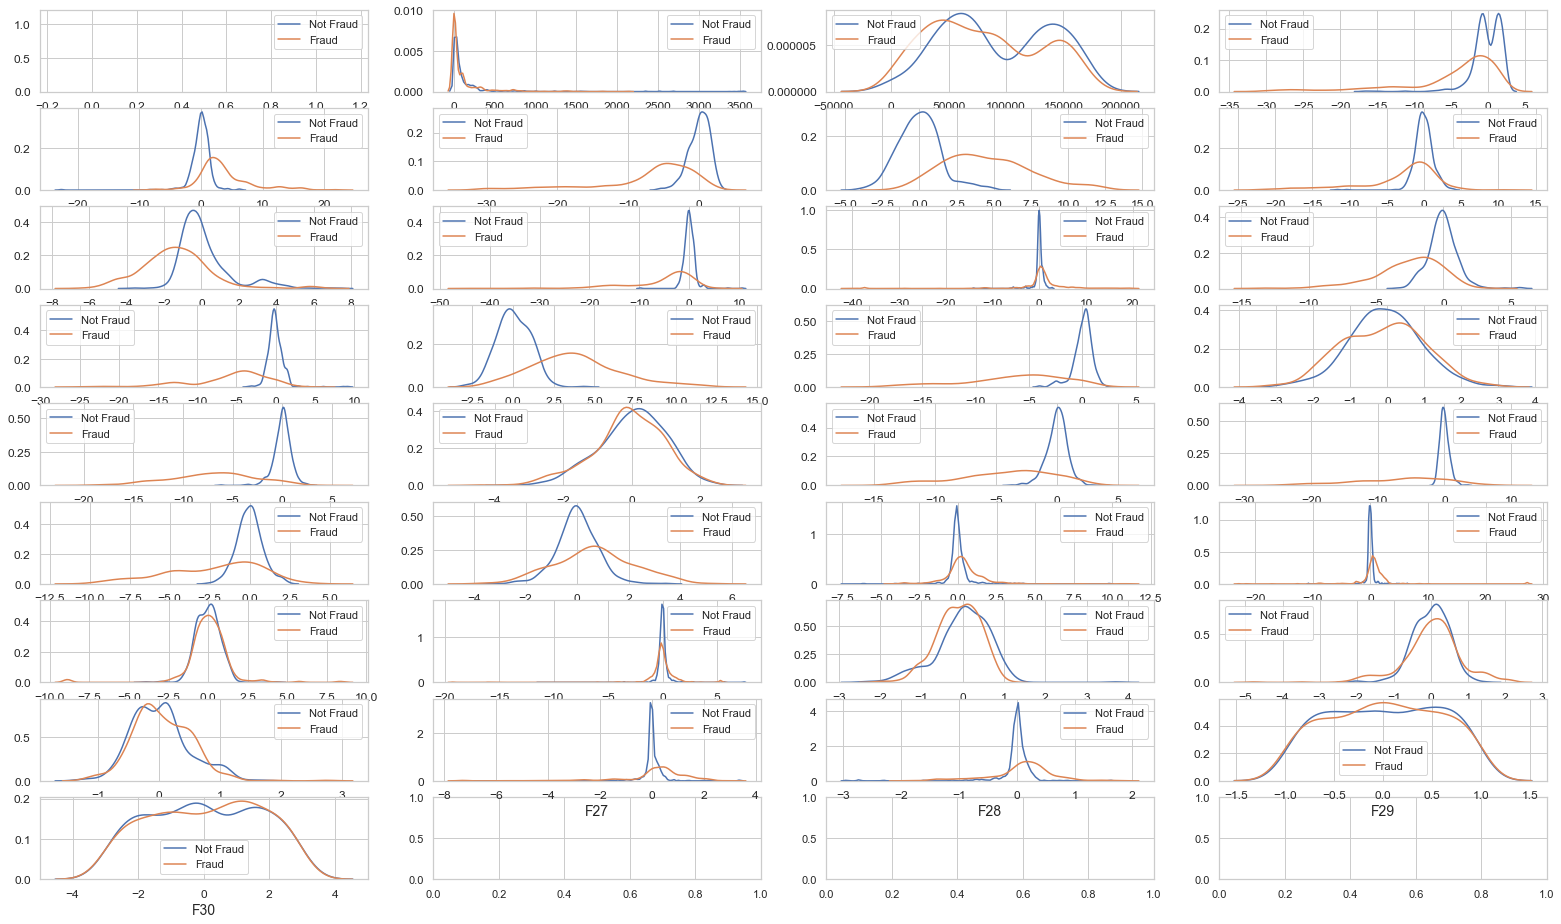

In [29]:
sns.set_style('whitegrid')
plt.figure()
fig,axes = plt.subplots(9,4,figsize=(27,16))

p = 0
for feat in index:
    p += 1
    plt.subplot(9,4,p)
    sns.kdeplot(sample[feat].loc[sample.is_fraud == 0],label = "Not Fraud")
    sns.kdeplot(sample[feat].loc[sample.is_fraud == 1],label ="Fraud")
    plt.xlabel(feat, fontsize = 14)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)

In [30]:
predicted_sampled, scores_sampled, feauters_imp_sampled = all_(train_df,test_df,valid_df)

0:	total: 676ms	remaining: 5m 37s
50:	total: 34.6s	remaining: 5m 4s
100:	total: 1m 9s	remaining: 4m 34s
150:	total: 1m 45s	remaining: 4m 2s
200:	total: 2m 20s	remaining: 3m 28s
250:	total: 2m 55s	remaining: 2m 54s
300:	total: 3m 29s	remaining: 2m 18s
350:	total: 4m 4s	remaining: 1m 43s
400:	total: 4m 39s	remaining: 1m 8s
450:	total: 5m 14s	remaining: 34.1s
499:	total: 5m 48s	remaining: 0us
[0]	train-auc:0.948674	valid-auc:0.946803
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 50 rounds.
[50]	train-auc:0.989157	valid-auc:0.982375
[100]	train-auc:0.994498	valid-auc:0.98638
[150]	train-auc:0.997927	valid-auc:0.988624
Stopping. Best iteration:
[146]	train-auc:0.997765	valid-auc:0.988784



In [31]:
scores_sampled.items()

dict_items([('rfc', 0.9493670886075949), ('cb', 0.930379746835443), ('xgb', 0.9854862119013063)])

In [32]:
pd.crosstab(valid_df[index[0]].values,predicted_sampled['rfc'], rownames=['Actual'], colnames=['Predicted'])

Predicted,0.0,1.0
Actual,,
0.0,77,2
1.0,6,73


In [33]:
pd.crosstab(valid_df[index[0]].values,predicted_sampled['cb'], rownames=['Actual'], colnames=['Predicted'])

Predicted,0.0,1.0
Actual,,
0.0,78,1
1.0,10,69


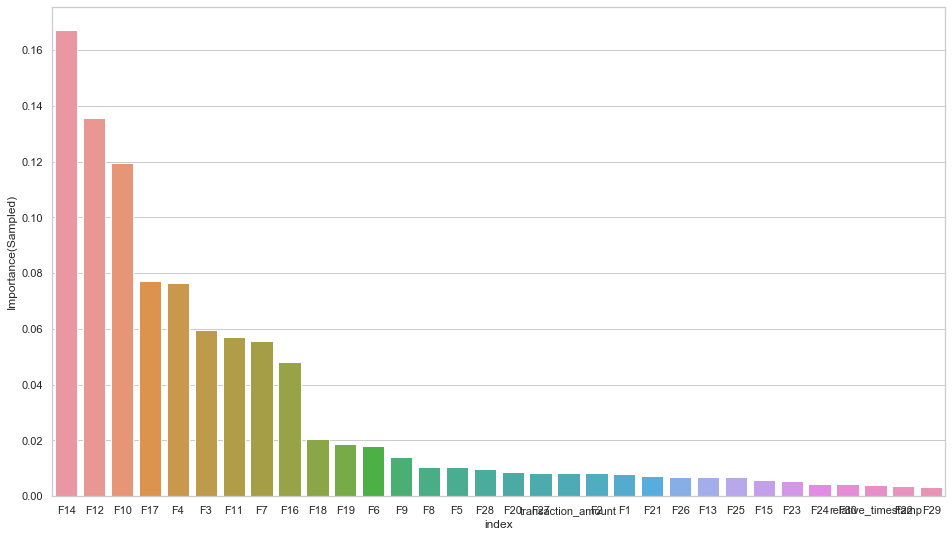

In [35]:
tmp_rfc_sampled = pd.DataFrame({"Importance(Sampled)" : feauters_imp_sampled['rfc'],"index" : index[1:].values})\
.sort_values("Importance(Sampled)",ascending=False)
tmp_rfc_sampled.index = range(32)
sns.barplot(x = "index",y = "Importance(Sampled)", data = tmp_rfc_sampled)

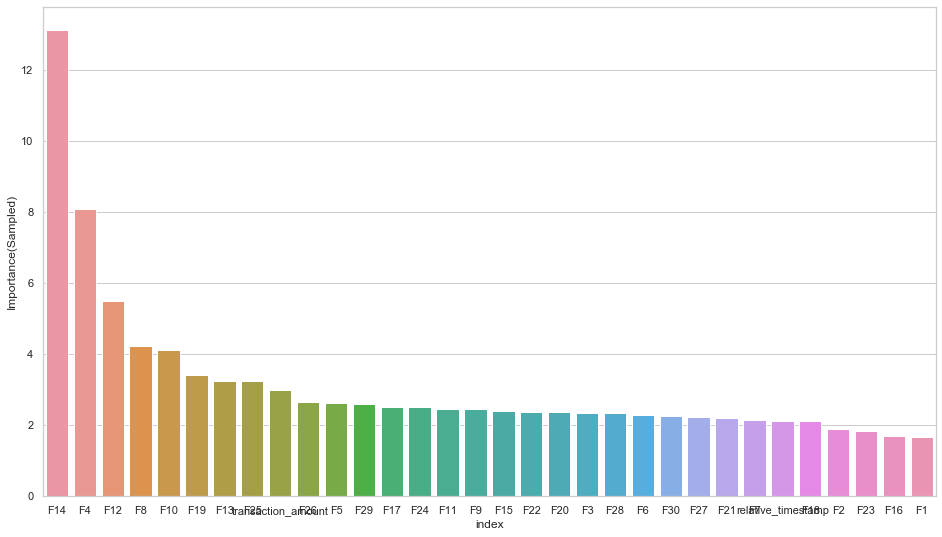

In [37]:
tmp_cb_sampled = pd.DataFrame({"Importance(Sampled)" : feauters_imp_sampled['cb'],"index" : index[1:].values})\
.sort_values("Importance(Sampled)",ascending=False)
tmp_cb_sampled.index = range(32)
sns.barplot(x = "index",y = "Importance(Sampled)", data = tmp_cb_sampled)

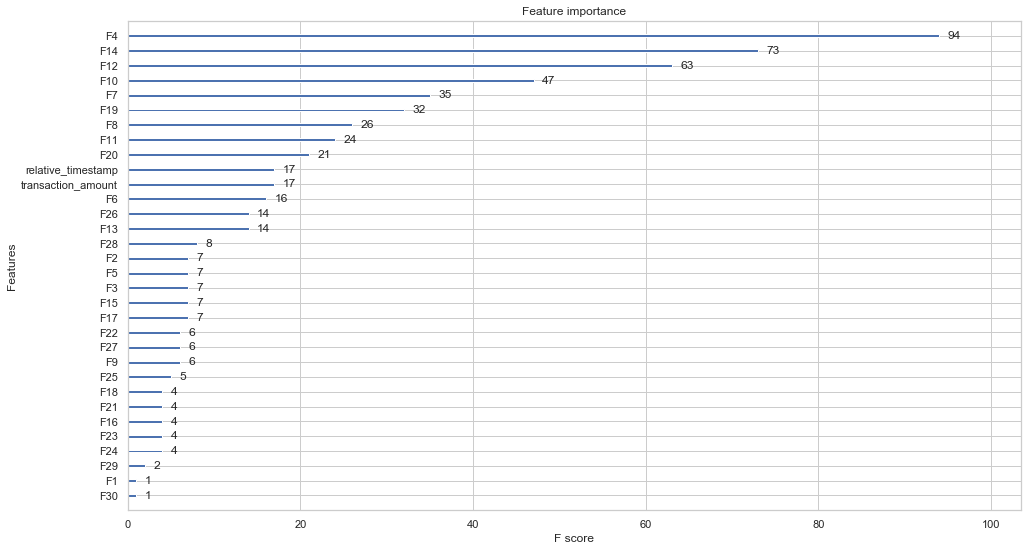

In [38]:
xgb.plot_importance(feauters_imp_sampled['xgb'])

In [39]:
print(scores.items())
print(scores_sampled.items())
print("\nBest classifier is XGBoost | Score: {0} ".format(scores_sampled['xgb']))

dict_items([('rfc', 0.898261138360353), ('cb', 0.8982831115530578), ('xgb', 0.9801108875598636)])
dict_items([('rfc', 0.9493670886075949), ('cb', 0.930379746835443), ('xgb', 0.9854862119013063)])

Best classifier is XGBoost | Score: 0.9854862119013063 


#### Cross validation for XGBoost on default and under sampled data

In [40]:
from xgboost import cv

params = {'objective':'binary:logistic',
                     'eta': 0.039,'silent': True,
                     'max_depth' : 2,'subsample' : 0.8,
                      'colsample_bytree' : 0.9,'eval_metric' : 'auc',
                      'random_state' : random_state
                     }

In [46]:
train_df, test_df = train_test_split(data, test_size=test_size, random_state=random_state, shuffle=True )
train_df, valid_df = train_test_split(train_df, test_size=valid_size, random_state=random_state, shuffle=True )

dtrain = xgb.DMatrix(train_df[index[1:]], train_df[index[0]].values)

xgb_cv = cv(params,dtrain,nfold=5,num_boost_round=1000, early_stopping_rounds=50, maximize=True)
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.889280,0.008208,0.882389,0.014788
1,0.913166,0.008529,0.908591,0.020169
2,0.913933,0.007505,0.908606,0.020181
3,0.913939,0.007507,0.908606,0.020181
4,0.913939,0.007507,0.908602,0.020183


In [41]:
train_df, test_df = train_test_split(sample, test_size=test_size, random_state=random_state, shuffle=True )
train_df, valid_df = train_test_split(train_df, test_size=valid_size, random_state=random_state, shuffle=True )

dtrain = xgb.DMatrix(train_df[index[1:]], train_df[index[0]].values)

xgb_cv = cv(params,dtrain,nfold=5,num_boost_round=1000, early_stopping_rounds=50, maximize=True)
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.957786,0.005214,0.949057,0.019463
1,0.963015,0.006660,0.955865,0.014473
2,0.965300,0.005175,0.957729,0.012633
3,0.968558,0.002967,0.962669,0.013326
4,0.969265,0.002304,0.962927,0.013427


### Conclusion

In [43]:
strC = {'rfc' : 'RandomForestClassifier','cb': 'CatBoostClassifier','xgb':'XGBoost' }
for j in scores.keys():
    print("{0} AUC metric score: {1} | [default dataset]".format(strC[j],scores[j]))
print("\n")
for j in scores_sampled.keys():
    print("{0} AUC metric  score: {1} | [under sampled dataset]".format(strC[j],scores_sampled[j]))

RandomForestClassifier AUC metric score:  0.898261138360353 | [default dataset]
CatBoostClassifier AUC metric score:  0.8982831115530578 | [default dataset]
XGBoost AUC metric score:  0.9801108875598636 | [default dataset]


RandomForestClassifier AUC metric  score:  0.9493670886075949 | [under sampled dataset]
CatBoostClassifier AUC metric  score:  0.930379746835443 | [under sampled dataset]
XGBoost AUC metric  score:  0.9854862119013063 | [under sampled dataset]


In [44]:
print("Most valuable features RandomForestClassifier")
print(pd.concat([tmp_rfc.head(),tmp_rfc_sampled.head()],axis = 1))

Most valuable features RandomForestClassifier
   Importance index  Importance(Sampled) index
0    0.146216   F12             0.167061   F14
1    0.137732   F17             0.135583   F12
2    0.107447   F14             0.119444   F10
3    0.078421   F11             0.077258   F17
4    0.078248   F10             0.076581    F4


In [45]:
print("Most valuable features CatBoostClassifier")
print(pd.concat([tmp_cb.head(),tmp_cb_sampled.head()],axis = 1))


Most valuable features CatBoostClassifier
   Importance               index  Importance(Sampled) index
0    7.144338                 F26            13.114023   F14
1    5.379739                  F1             8.088270    F4
2    5.237272  transaction_amount             5.483111   F12
3    5.112821                  F4             4.231895    F8
4    4.775889                  F8             4.112913   F10
